In [470]:
#SVM and 3 layer NN diffrence with Titanic dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [471]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]

In [472]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [473]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [474]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [475]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [476]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [477]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [478]:
train_df.shape

(891, 12)

In [479]:
test_df.shape

(418, 11)

In [480]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [481]:
train_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Flynn, Mr. James",male,1601,G6,S
freq,1,577,7,4,644


In [482]:
train_df[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [483]:
train_df[['Sex','Survived']].groupby('Sex').mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [484]:
train_df[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [485]:
train_df[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


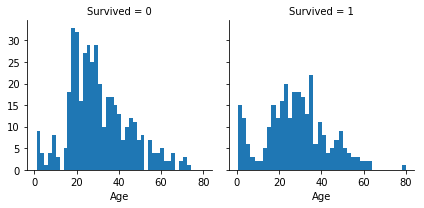

In [486]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=40)

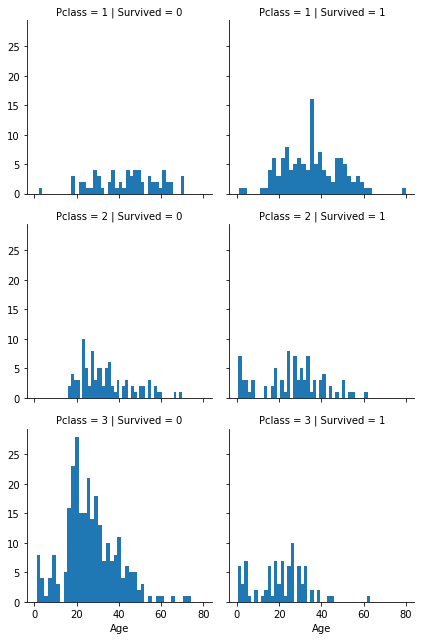

In [487]:
g=sns.FacetGrid(train_df,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=40)

C:\Users\Tushar saini\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Tushar saini\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


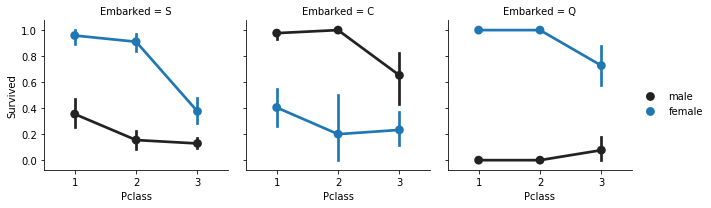

In [488]:
g=sns.FacetGrid(train_df,col='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

C:\Users\Tushar saini\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Tushar saini\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


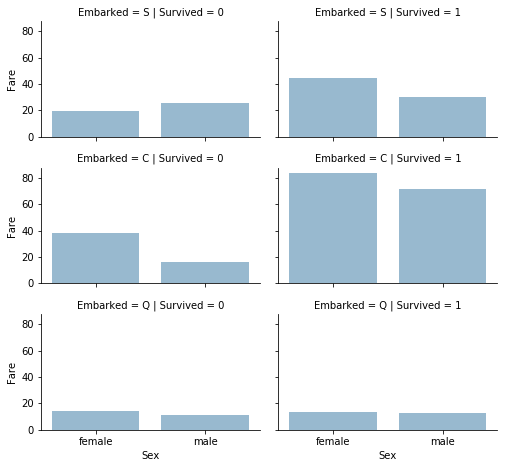

In [489]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Data Cleaning

In [490]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)

In [491]:
combine=[train_df,test_df]

In [492]:
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


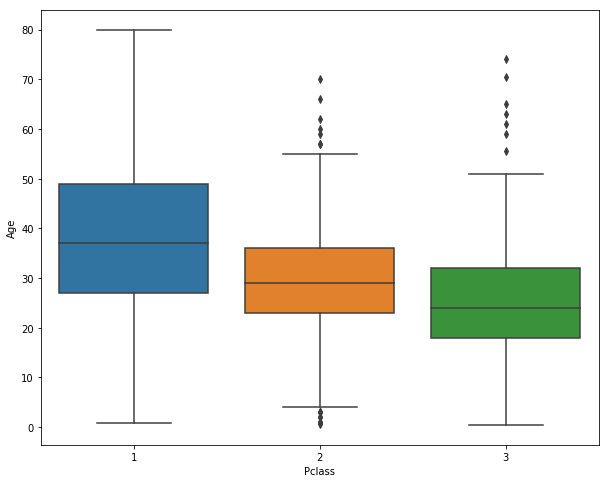

In [493]:
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Pclass'],train_df['Age'])

In [494]:
def age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [495]:
test_df['Age']=train_df[['Age','Pclass']].apply(age,axis=1)

In [496]:
train_df['Age']=train_df[['Age','Pclass']].apply(age,axis=1)

In [497]:
combine=[train_df,test_df]

In [498]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

In [499]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [500]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
train_df[['IsAlone','Survived']].groupby(['IsAlone']).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [501]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1,1


In [502]:
train_df=train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[train_df,test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,1


In [503]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
Fare           False
Embarked        True
IsAlone        False
dtype: bool

In [504]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [505]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [506]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,1


In [507]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
Fare            True
Embarked       False
IsAlone        False
dtype: bool

In [508]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,892,3,"Kelly, Mr. James",0,22.0,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,38.0,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,26.0,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,35.0,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,35.0,12.2875,0,0


In [509]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
Fare           False
Embarked       False
IsAlone        False
dtype: bool

In [510]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,1


In [511]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,892,3,"Kelly, Mr. James",0,22.0,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,38.0,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,26.0,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,35.0,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,35.0,12.2875,0,0


In [512]:
train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]

In [513]:
train_df=train_df.drop(['PassengerId'],axis=1)
combine=[train_df,test_df]

## Perform SVM

In [514]:
X_train=train_df.drop(['Survived'],axis=1)
y_train=train_df['Survived']
X_test1=test_df.drop(['PassengerId'],axis=1).copy()
X_train.shape, y_train.shape, X_test1.shape

((891, 6), (891,), (418, 6))

In [515]:
from sklearn.svm import SVC

In [516]:
model1=SVC()

In [517]:
model1.fit(X_train,y_train)

C:\Users\Tushar saini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [518]:
svc_pred=model1.predict(X_test1)

In [519]:
SvmAccuracy=model1.score(X_train,y_train)

In [520]:
SVM_model_Accuracy=round(SvmAccuracy*100,2)

In [521]:
SVM_model_Accuracy

90.12

## 3 Layer neural Network

In [522]:
from sklearn.model_selection import train_test_split

In [523]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25)

In [524]:
input_shape=X_train.shape[1]
input_shape

6

In [525]:
DL_model=None
insh=input_shape

In [526]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers
from keras import regularizers

In [527]:
model=Sequential()

model.add(Dense(8,activation='relu',input_shape=(6,)))
model.add(Dropout(0.3))
model.add(Dense(4,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [528]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [529]:
model.fit(X_train,y_train,epochs=1000,verbose=2)

Epoch 1/1000
 - 1s - loss: 1.1612 - acc: 0.4207
Epoch 2/1000
 - 0s - loss: 1.1110 - acc: 0.4386
Epoch 3/1000
 - 0s - loss: 1.0600 - acc: 0.4506
Epoch 4/1000
 - 0s - loss: 1.0361 - acc: 0.4401
Epoch 5/1000
 - 0s - loss: 0.9261 - acc: 0.4895
Epoch 6/1000
 - 0s - loss: 0.9307 - acc: 0.4686
Epoch 7/1000
 - 0s - loss: 0.8780 - acc: 0.4835
Epoch 8/1000
 - 0s - loss: 0.7446 - acc: 0.5689
Epoch 9/1000
 - 0s - loss: 0.7117 - acc: 0.5898
Epoch 10/1000
 - 0s - loss: 0.6888 - acc: 0.6048
Epoch 11/1000
 - 0s - loss: 0.7032 - acc: 0.5943
Epoch 12/1000
 - 0s - loss: 0.6621 - acc: 0.6392
Epoch 13/1000
 - 0s - loss: 0.6813 - acc: 0.5973
Epoch 14/1000
 - 0s - loss: 0.6527 - acc: 0.6138
Epoch 15/1000
 - 0s - loss: 0.6637 - acc: 0.5943
Epoch 16/1000
 - 0s - loss: 0.6516 - acc: 0.6183
Epoch 17/1000
 - 0s - loss: 0.6743 - acc: 0.5793
Epoch 18/1000
 - 0s - loss: 0.6560 - acc: 0.6078
Epoch 19/1000
 - 0s - loss: 0.6657 - acc: 0.5749
Epoch 20/1000
 - 0s - loss: 0.6577 - acc: 0.5943
Epoch 21/1000
 - 0s - loss: 0

Epoch 168/1000
 - 0s - loss: 0.5620 - acc: 0.7260
Epoch 169/1000
 - 0s - loss: 0.5436 - acc: 0.7350
Epoch 170/1000
 - 0s - loss: 0.5444 - acc: 0.7201
Epoch 171/1000
 - 0s - loss: 0.5338 - acc: 0.7500
Epoch 172/1000
 - 0s - loss: 0.5563 - acc: 0.7305
Epoch 173/1000
 - 0s - loss: 0.5454 - acc: 0.7335
Epoch 174/1000
 - 0s - loss: 0.5497 - acc: 0.7081
Epoch 175/1000
 - 0s - loss: 0.5378 - acc: 0.7485
Epoch 176/1000
 - 0s - loss: 0.5429 - acc: 0.7515
Epoch 177/1000
 - 0s - loss: 0.5463 - acc: 0.7410
Epoch 178/1000
 - 0s - loss: 0.5308 - acc: 0.7440
Epoch 179/1000
 - 0s - loss: 0.5548 - acc: 0.7171
Epoch 180/1000
 - 0s - loss: 0.5351 - acc: 0.7470
Epoch 181/1000
 - 0s - loss: 0.5438 - acc: 0.7500
Epoch 182/1000
 - 0s - loss: 0.5263 - acc: 0.7605
Epoch 183/1000
 - 0s - loss: 0.5499 - acc: 0.7365
Epoch 184/1000
 - 0s - loss: 0.5360 - acc: 0.7380
Epoch 185/1000
 - 0s - loss: 0.5490 - acc: 0.7320
Epoch 186/1000
 - 0s - loss: 0.5474 - acc: 0.7246
Epoch 187/1000
 - 0s - loss: 0.5360 - acc: 0.7425


Epoch 332/1000
 - 0s - loss: 0.4728 - acc: 0.7829
Epoch 333/1000
 - 0s - loss: 0.4684 - acc: 0.7754
Epoch 334/1000
 - 0s - loss: 0.4596 - acc: 0.7934
Epoch 335/1000
 - 0s - loss: 0.4849 - acc: 0.7515
Epoch 336/1000
 - 0s - loss: 0.4731 - acc: 0.7814
Epoch 337/1000
 - 0s - loss: 0.4667 - acc: 0.7814
Epoch 338/1000
 - 0s - loss: 0.4842 - acc: 0.7695
Epoch 339/1000
 - 0s - loss: 0.4646 - acc: 0.7784
Epoch 340/1000
 - 0s - loss: 0.4910 - acc: 0.7665
Epoch 341/1000
 - 0s - loss: 0.4773 - acc: 0.7844
Epoch 342/1000
 - 0s - loss: 0.4835 - acc: 0.7769
Epoch 343/1000
 - 0s - loss: 0.4829 - acc: 0.7650
Epoch 344/1000
 - 0s - loss: 0.4896 - acc: 0.7784
Epoch 345/1000
 - 0s - loss: 0.5065 - acc: 0.7590
Epoch 346/1000
 - 0s - loss: 0.4745 - acc: 0.7754
Epoch 347/1000
 - 0s - loss: 0.4863 - acc: 0.7635
Epoch 348/1000
 - 0s - loss: 0.4711 - acc: 0.7874
Epoch 349/1000
 - 0s - loss: 0.4804 - acc: 0.7680
Epoch 350/1000
 - 0s - loss: 0.4847 - acc: 0.7665
Epoch 351/1000
 - 0s - loss: 0.4607 - acc: 0.7979


Epoch 496/1000
 - 0s - loss: 0.4672 - acc: 0.7754
Epoch 497/1000
 - 0s - loss: 0.4736 - acc: 0.7769
Epoch 498/1000
 - 0s - loss: 0.4664 - acc: 0.7889
Epoch 499/1000
 - 0s - loss: 0.4749 - acc: 0.7784
Epoch 500/1000
 - 0s - loss: 0.4633 - acc: 0.7829
Epoch 501/1000
 - 0s - loss: 0.4726 - acc: 0.7650
Epoch 502/1000
 - 0s - loss: 0.4784 - acc: 0.7829
Epoch 503/1000
 - 0s - loss: 0.4737 - acc: 0.7710
Epoch 504/1000
 - 0s - loss: 0.4656 - acc: 0.7814
Epoch 505/1000
 - 0s - loss: 0.4571 - acc: 0.7904
Epoch 506/1000
 - 0s - loss: 0.4696 - acc: 0.7904
Epoch 507/1000
 - 0s - loss: 0.4561 - acc: 0.7874
Epoch 508/1000
 - 0s - loss: 0.4792 - acc: 0.7680
Epoch 509/1000
 - 0s - loss: 0.4720 - acc: 0.7740
Epoch 510/1000
 - 0s - loss: 0.4681 - acc: 0.7829
Epoch 511/1000
 - 0s - loss: 0.4692 - acc: 0.7874
Epoch 512/1000
 - 0s - loss: 0.4739 - acc: 0.7784
Epoch 513/1000
 - 0s - loss: 0.4672 - acc: 0.7844
Epoch 514/1000
 - 0s - loss: 0.4824 - acc: 0.7710
Epoch 515/1000
 - 0s - loss: 0.4789 - acc: 0.7695


Epoch 660/1000
 - 0s - loss: 0.4768 - acc: 0.7814
Epoch 661/1000
 - 0s - loss: 0.4519 - acc: 0.7769
Epoch 662/1000
 - 0s - loss: 0.4622 - acc: 0.7829
Epoch 663/1000
 - 0s - loss: 0.4563 - acc: 0.7859
Epoch 664/1000
 - 0s - loss: 0.4718 - acc: 0.7889
Epoch 665/1000
 - 0s - loss: 0.4640 - acc: 0.7829
Epoch 666/1000
 - 0s - loss: 0.4833 - acc: 0.7784
Epoch 667/1000
 - 0s - loss: 0.4760 - acc: 0.7814
Epoch 668/1000
 - 0s - loss: 0.4614 - acc: 0.7829
Epoch 669/1000
 - 0s - loss: 0.4650 - acc: 0.7769
Epoch 670/1000
 - 0s - loss: 0.4780 - acc: 0.7740
Epoch 671/1000
 - 0s - loss: 0.4602 - acc: 0.7799
Epoch 672/1000
 - 0s - loss: 0.4738 - acc: 0.7784
Epoch 673/1000
 - 0s - loss: 0.4470 - acc: 0.7964
Epoch 674/1000
 - 0s - loss: 0.4663 - acc: 0.7874
Epoch 675/1000
 - 0s - loss: 0.4598 - acc: 0.7769
Epoch 676/1000
 - 0s - loss: 0.4837 - acc: 0.7769
Epoch 677/1000
 - 0s - loss: 0.4812 - acc: 0.7769
Epoch 678/1000
 - 0s - loss: 0.4573 - acc: 0.7814
Epoch 679/1000
 - 0s - loss: 0.4748 - acc: 0.7769


Epoch 824/1000
 - 0s - loss: 0.4757 - acc: 0.7769
Epoch 825/1000
 - 0s - loss: 0.4483 - acc: 0.7844
Epoch 826/1000
 - 0s - loss: 0.4801 - acc: 0.7754
Epoch 827/1000
 - 0s - loss: 0.4542 - acc: 0.7754
Epoch 828/1000
 - 0s - loss: 0.4794 - acc: 0.7680
Epoch 829/1000
 - 0s - loss: 0.4616 - acc: 0.7874
Epoch 830/1000
 - 0s - loss: 0.4576 - acc: 0.7949
Epoch 831/1000
 - 0s - loss: 0.4732 - acc: 0.7710
Epoch 832/1000
 - 0s - loss: 0.4766 - acc: 0.7710
Epoch 833/1000
 - 0s - loss: 0.4525 - acc: 0.7844
Epoch 834/1000
 - 0s - loss: 0.4774 - acc: 0.7814
Epoch 835/1000
 - 0s - loss: 0.4583 - acc: 0.7784
Epoch 836/1000
 - 0s - loss: 0.4650 - acc: 0.7814
Epoch 837/1000
 - 0s - loss: 0.4501 - acc: 0.7889
Epoch 838/1000
 - 0s - loss: 0.4727 - acc: 0.7650
Epoch 839/1000
 - 0s - loss: 0.4631 - acc: 0.7799
Epoch 840/1000
 - 0s - loss: 0.4648 - acc: 0.7799
Epoch 841/1000
 - 0s - loss: 0.4661 - acc: 0.7859
Epoch 842/1000
 - 0s - loss: 0.4719 - acc: 0.7650
Epoch 843/1000
 - 0s - loss: 0.4476 - acc: 0.7874


Epoch 988/1000
 - 0s - loss: 0.4565 - acc: 0.7769
Epoch 989/1000
 - 0s - loss: 0.4614 - acc: 0.7799
Epoch 990/1000
 - 0s - loss: 0.4767 - acc: 0.7889
Epoch 991/1000
 - 0s - loss: 0.4684 - acc: 0.7859
Epoch 992/1000
 - 0s - loss: 0.4656 - acc: 0.7710
Epoch 993/1000
 - 0s - loss: 0.4757 - acc: 0.7725
Epoch 994/1000
 - 0s - loss: 0.4485 - acc: 0.7904
Epoch 995/1000
 - 0s - loss: 0.4575 - acc: 0.7844
Epoch 996/1000
 - 0s - loss: 0.4541 - acc: 0.7934
Epoch 997/1000
 - 0s - loss: 0.4761 - acc: 0.7740
Epoch 998/1000
 - 0s - loss: 0.4813 - acc: 0.7829
Epoch 999/1000
 - 0s - loss: 0.4549 - acc: 0.7859
Epoch 1000/1000
 - 0s - loss: 0.4634 - acc: 0.7754


In [530]:
model.evaluate(X_test.values,y_test.values)

223/223 [==============================] - 0s 702us/step


[0.43791174434225655, 0.7937219698867456]

In [531]:
nn_prediction=model.predict(X_test1)

### SVM model give higher accuracy than 3 layer Neural Network on this titanic survival prediction data

In [532]:
s=pd.DataFrame({"PassengerId":test_df['PassengerId'],
               'Survived':svc_pred})
s.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [533]:
s.to_csv('submission.csv',sep=',',index=False)

### END